In [4]:
# import matplotlib.pyplot as plt
R2score_RFR=0.82

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [6]:
# filepath = "C:\\Users\\Admin\\Downloads\\RMIPRMODEL\\corrdatawithTEXT.xlsx"
filepath = "C:\\Users\\Admin\\Downloads\\RMIPRMODEL\\Ksuggestdata.xlsx"

df = pd.read_excel(filepath)

# print(df.head())

 #Calculate average values for Rate and Duration columns
avg_rate = df['Rate'].mean()
# avg_duration = 0


# Fill missing values with averages (explicit assignment)
df['Rate'] = df['Rate'].fillna(avg_rate)
df['Duration'] = df['Duration'].fillna(0)
df['Condition']=df['Condition'].fillna(0.5)  
print(df.head())


  Material    Rate  Condition  Concentration  Temperature_degC  Duration
0      304  0.0005        0.0           10.0               200      0.08
1      304  0.0250        0.0           10.0               101      4.00
2      304  0.0250        0.0           25.0               407      5.00
3      304  0.2000        0.0           50.0               110      4.00
4      304  0.0025        0.0           82.0                27     16.00


In [7]:

# Define the feature columns and the target column
feature_columns = ['Material', 'Condition', 'Concentration', 'Temperature_degC', 'Duration']
target_column = 'Rate'

# Separate features (X) and target (y)
X = df[feature_columns].copy()
y = df[target_column]

# Convert 'Material' column to numeric using encoding, if it's categorical
X['Material'] = X['Material'].astype('category').cat.codes

# Split the dataset into training and test sets (e.g., 80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 292 samples
Test set size: 73 samples


In [8]:
print(X_train)

     Material  Condition  Concentration  Temperature_degC  Duration
211         8        0.5           10.0                20       0.0
340        21        0.5           20.0               100       2.0
202         7        0.5           60.0               407       0.0
75          1        0.0           76.0               100      16.0
84          1        1.0           82.0               115      16.0
..        ...        ...            ...               ...       ...
71          1        0.0           83.0               116      16.0
106         1        2.0           30.0                80       0.0
270        11        0.5           80.0               407       0.0
348        22        3.0           69.0               100       6.0
102         1        2.0           70.0                50       0.0

[292 rows x 5 columns]


In [9]:
print(y_train)

211    0.0013
340    0.0500
202    0.0400
75     0.0400
84     0.2300
        ...  
71     0.2300
106    0.0090
270    0.0283
348    0.1800
102    0.0230
Name: Rate, Length: 292, dtype: float64


In [10]:
print(X_test)


     Material  Condition  Concentration  Temperature_degC  Duration
193         4        0.0            1.0                20       0.0
33          0        2.0           70.0               100       0.0
15          0        0.0           85.0                50       0.0
309        14        0.5            1.0                20       0.0
57          1        0.0           50.0               110       4.0
..        ...        ...            ...               ...       ...
203         7        0.5           70.0                20       0.0
82          1        0.0           83.0                27      16.0
94          1        1.0           85.0               100      16.0
192         4        0.5           97.0               407       0.0
325        15        2.0           53.0                93      28.0

[73 rows x 5 columns]


In [11]:


print(y_test)

193    0.001000
33     0.530000
15     0.230000
309    0.001000
57     0.272359
         ...   
203    0.002000
82     0.002000
94     0.009000
192    0.600000
325    0.100000
Name: Rate, Length: 73, dtype: float64


# result for random forest regressor

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any NaN in y_train:", np.any(np.isnan(y_train)))

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any NaN in y_train:", np.any(np.isnan(y_train)))

Any NaN in X_train: True
Any NaN in y_train: False
Any NaN in X_train: False
Any NaN in y_train: False


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Print first few predictions vs actual values
print("\nFirst few predictions vs actual values:")
for i in range(min(35, len(y_pred))):  # Ensure we do not exceed the length of y_pred
    print(f"Prediction: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# # Compute the accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy Score: {accuracy}")

# # Optional: Print classification report for more detailed metrics
# report = classification_report(y_test, y_pred)
# print("\nClassification Report:\n", report)

Mean Absolute Error (MAE): 0.27
R-squared (R2): -0.05

First few predictions vs actual values:
Prediction: 0.00, Actual: 0.00
Prediction: 0.92, Actual: 0.53
Prediction: 0.72, Actual: 0.23
Prediction: 0.00, Actual: 0.00
Prediction: 0.25, Actual: 0.27
Prediction: 0.00, Actual: 0.00
Prediction: 0.06, Actual: 0.01
Prediction: 1.70, Actual: 1.39
Prediction: 0.01, Actual: 0.00
Prediction: 0.03, Actual: 0.05
Prediction: 0.64, Actual: 0.23
Prediction: 0.34, Actual: 0.23
Prediction: 0.00, Actual: 0.00
Prediction: 0.14, Actual: 0.23
Prediction: 0.05, Actual: 0.05
Prediction: 0.00, Actual: 0.00
Prediction: 0.24, Actual: 0.00
Prediction: 0.00, Actual: 0.00
Prediction: 0.31, Actual: 0.23
Prediction: 0.03, Actual: 0.00
Prediction: 0.03, Actual: 0.03
Prediction: 0.01, Actual: 0.00
Prediction: 0.03, Actual: 0.00
Prediction: 0.03, Actual: 0.03
Prediction: 0.00, Actual: 0.00
Prediction: 0.00, Actual: 0.00
Prediction: 0.04, Actual: 0.03
Prediction: 0.00, Actual: 0.16
Prediction: 0.39, Actual: 0.00
Predic

Mean Absolute Error (MAE): 66.95
R-squared (R2): 0.82


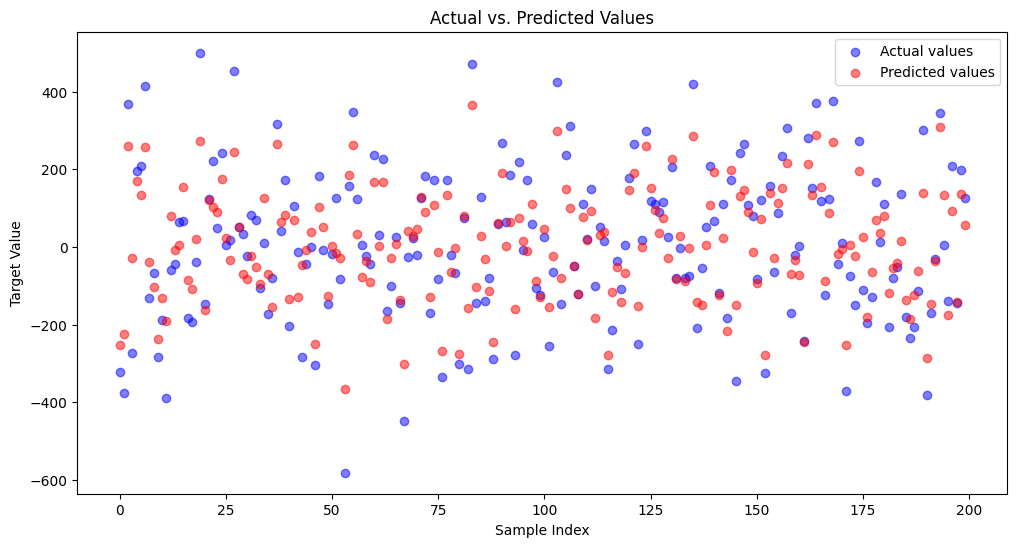

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Generate a regression dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values', alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()


In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Generate a regression dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Mean Absolute Error (MAE): 66.95
R-squared (R2): 0.82


Mean Absolute Error (MAE): 66.95
R-squared (R2): 0.82


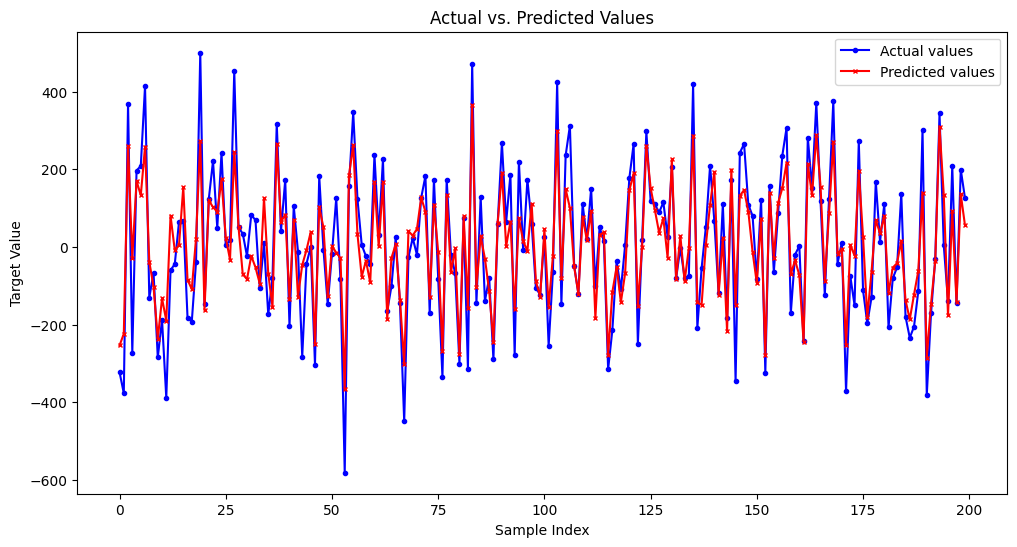

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Generate a regression dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot predictions vs. actual values using line plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual values', linestyle='-', marker='o', markersize=3)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted values', linestyle='-', marker='x', markersize=3)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()


            Feature  Importance
3  Temperature_degC    0.278708
2     Concentration    0.269798
0          Material    0.233458
1         Condition    0.151426
4          Duration    0.066610


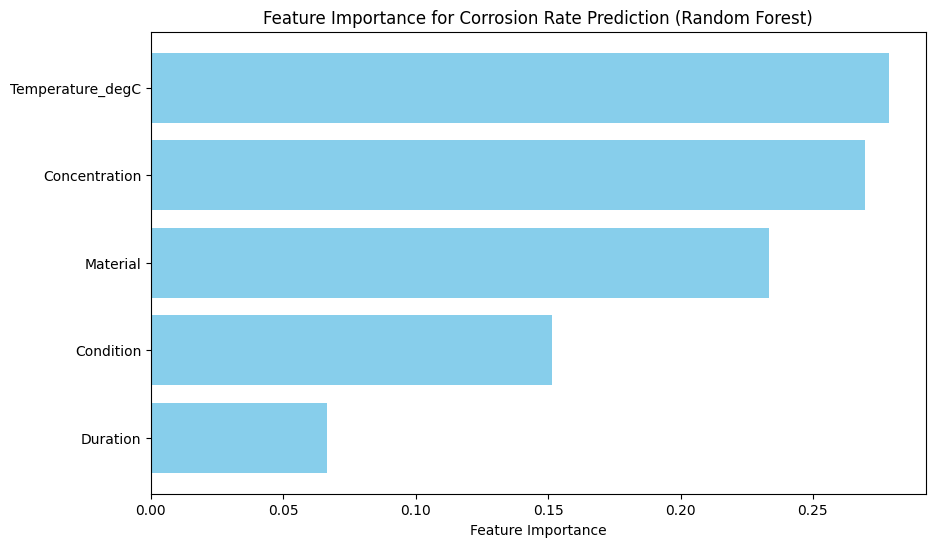

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Feature and target columns
feature_columns = ['Material', 'Condition', 'Concentration', 'Temperature_degC', 'Duration']
target_column = 'Rate'

# Separate features (X) and target (y)
X = df[feature_columns].copy()
y = df[target_column]

# Convert 'Material' column to numeric if it's categorical
X['Material'] = X['Material'].astype('category').cat.codes

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get the feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Corrosion Rate Prediction (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


Mean Absolute Error (MAE): 66.95
R-squared (R2): 0.82


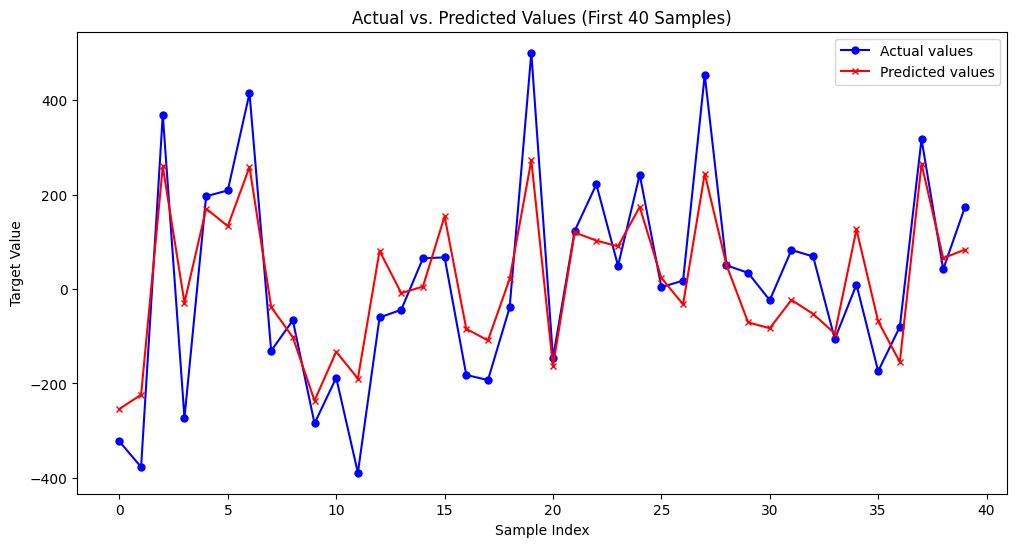

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Generate a regression dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Select the first 40 samples for visualization
num_samples = 40
y_test_subset = y_test[:num_samples]
y_pred_subset = y_pred[:num_samples]

# Plot predictions vs. actual values using line plot for the first 40 samples
plt.figure(figsize=(12, 6))
plt.plot(range(num_samples), y_test_subset, color='blue', label='Actual values', linestyle='-', marker='o', markersize=5)
plt.plot(range(num_samples), y_pred_subset, color='red', label='Predicted values', linestyle='-', marker='x', markersize=5)
plt.title("Actual vs. Predicted Values (First 40 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest.predict(X_test_scaled)

# Create a scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predictions', alpha=0.6)

# Plot a line for ideal predictions (y = x)
x_values = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_values, x_values, color='red', linestyle='--', label='Ideal Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values using Random Forest Regressor')
plt.legend()
plt.grid()
plt.show()


In [1]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Convert predictions to binary classes based on a threshold
y_pred_binary_rf = (y_pred_rf > threshold).astype(int)

# Calculate F1 score
f1_rf = f1_score(y_test_binary, y_pred_binary_rf)

# Print the evaluation metrics
print("\nRandom Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")
print(f"F1 Score: {f1_rf}")


NameError: name 'X_train_scaled' is not defined

In [ ]:
# import numpy as np

# print("Any NaN in X_train_scaled:", np.any(np.isnan(X_train_scaled)))
# print("Any infinite values in X_train_scaled:", np.any(np.isinf(X_train_scaled)))
# print("Any NaN in y_train:", np.any(np.isnan(y_train)))
# print("Any infinite values in y_train:", np.any(np.isinf(y_train)))


# Using decesion tree


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression
import numpy as np

# Generate a regression dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"R-squared (R2): {r2:.2f}")

# Optional: Plot first few predicted vs actual values
plt.figure(figsize=(10,5))
plt.plot(y_pred[:200], label='Predicted', marker='o',color='red')
plt.plot(y_test[:200], label='Actual', marker='x',color='blue')
plt.title('Actual vs Predicted values (first 200 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, f1_score

# Create and train the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Convert predictions to binary classes based on a threshold
threshold = 0.5  # Adjust based on your use case
y_pred_binary_dt = (y_pred_dt > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate F1 score
f1_dt = f1_score(y_test_binary, y_pred_binary_dt)

# Print the evaluation metrics
print("Decision Tree Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R2): {r2_dt}")
print(f"F1 Score: {f1_dt}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set using the Decision Tree model
y_pred_dt = decision_tree.predict(X_test_scaled)

# Create a scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Predictions', alpha=0.6)

# Plot a line for ideal predictions (y = x)
x_values = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_values, x_values, color='red', linestyle='--', label='Ideal Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values using Decision Tree Regressor')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Feature and target columns
feature_columns = ['Material', 'Condition', 'Concentration', 'Temperature_degC', 'Duration']
target_column = 'Rate'

# Separate features (X) and target (y)
X = df[feature_columns].copy()
y = df[target_column]

# Convert 'Material' column to numeric if it's categorical
X['Material'] = X['Material'].astype('category').cat.codes

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Get the feature importance
feature_importance = dt_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Corrosion Rate Prediction (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()


# using SVR

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)

# result for GradientBoostingRegressor

In [2]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any NaN in y_train:", np.any(np.isnan(y_train)))

# X_train = X_train.fillna(X_train.median())
# X_test = X_test.fillna(X_test.median())

print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any NaN in y_train:", np.any(np.isnan(y_train)))

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# import numpy as np

# # Initialize the Linear Regression model
# model = GradientBoostingRegressor(random_state=42)

# # Train the model
# model.fit(X_train_scaled, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_scaled)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"R-squared (R2): {r2}")

# # Optional: Print first few predictions vs actual values
# print("\nFirst few predictions vs actual values:")
# for i in range(35):
#     print(f"Prediction: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create a pipeline that first imputes missing values, then fits the model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can choose 'median' or 'most_frequent' as well
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Train the model
pipeline.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Optional: Print first few predictions vs actual values
print("\nFirst few predictions vs actual values:")
for i in range(35):
    print(f"Prediction: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)

# Plot a line for ideal predictions (y = x)
x_values = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_values, x_values, color='red', linestyle='--', label='Ideal Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values using Gradient Boost regressor')
plt.legend()
plt.grid()
plt.show()




In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, f1_score
from sklearn.preprocessing import Binarizer

# Train the model
pipeline.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_GBR = pipeline.predict(X_test_scaled)

# Evaluate the model
mae_GBR = mean_absolute_error(y_test, y_pred)
r2_GBR = r2_score(y_test, y_pred)

# Optional: Convert predictions and actual values to binary classes based on a threshold
# For example, let's say we consider anything above a certain value as 1 and below as 0.
threshold = 0.5  # Adjust this threshold based on your specific use case
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate F1 score
f1_GBR = f1_score(y_test_binary, y_pred_binary)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"F1 Score: {f1}")

# # Optional: Print first few predictions vs actual values
# print("\nFirst few predictions vs actual values:")
# for i in range(35):
#     print(f"Prediction: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Generate a regression dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor model
gbr_regressor = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = gbr_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot first 40 predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_pred[:200], label='Predicted', marker='o', linestyle='-', color='red')
plt.plot(y_test[:200], label='Actual', marker='x', linestyle='-', color='blue')
plt.title('Actual vs Predicted Values (First 200 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()



In [ ]:
print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any NaN in y_train:", np.any(np.isnan(y_train)))

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

print("Any NaN in X_train:", np.any(np.isnan(X_train)))
print("Any NaN in y_train:", np.any(np.isnan(y_train)))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Feature and target columns
feature_columns = ['Material', 'Condition', 'Concentration', 'Temperature_degC', 'Duration']
target_column = 'Rate'

# Separate features (X) and target (y)
X = df[feature_columns].copy()
y = df[target_column]

# Convert 'Material' column to numeric if it's categorical
X['Material'] = X['Material'].astype('category').cat.codes

# Handle missing values using SimpleImputer (fill NaN with the mean of each column)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=feature_columns)

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Get the feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightcoral')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Corrosion Rate Prediction (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Range of number of estimators
n_estimators_range = range(1, 101)
mse_values = []

# Evaluate the model for different numbers of estimators
for n_estimators in n_estimators_range:
    model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values, marker='o')
plt.title('Elbow Method for Gradient Boosting Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid()
plt.xticks(np.arange(0, 101, 10))
plt.show()


In [ ]:
# r2 = r2_score(y_test, y_pred)
# r2accuracy = accuracy_score(y_test, y_pred)

# # Print the accuracy score
# print(f"Accuracy Score: {accuracy:.2f}")